<a href="https://colab.research.google.com/github/mmacom/Proiecte_facultate_py/blob/main/invatareautomatatema3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

. Prezentarea algoritmilor
# Regresia Logistică este utilizată pentru clasificarea binară, prezicând probabilitatea apartenenței unei instanțe la o anumită clasă.
# K-Nearest Neighbors clasifică o instanță pe baza celor mai apropiați vecini din setul de antrenament.
# Naive Bayes presupune independența dintre caracteristici și utilizează teorema lui Bayes pentru clasificare.
# ID3 (Decision Tree) creează un arbore de decizie pe baza informației și a entropiei.



2. Descrierea problemei
# Vom rezolva problema detectării fraudelor în tranzacții financiare. Setul de date conține caracteristici numerice ale tranzacțiilor,
# iar etichetele indică dacă o tranzacție este frauduloasă sau nu. Scopul este să comparăm performanța celor patru algoritmi pentru această problemă.

3. Generarea setului de date sintetic

In [2]:
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2,
                           weights=[0.95, 0.05], random_state=42)
data = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(20)])
data['Class'] = y

 4. Împărțirea setului de date în antrenament și testare

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

5. Standardizarea caracteristicilor

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


6. Antrenarea modelului Logistic Regression

In [5]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

 7. Antrenarea modelului KNN

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

8. Antrenarea modelului Naive Bayes

In [7]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

9. Antrenarea modelului ID3 (Decision Tree)

In [8]:
id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3.fit(X_train, y_train)
y_pred_id3 = id3.predict(X_test)

10. Evaluarea modelelor

In [9]:
models = {'Logistic Regression': y_pred_logreg, 'KNN': y_pred_knn, 'Naive Bayes': y_pred_nb, 'ID3': y_pred_id3}
metrics = {}
conf_matrices = {}

for model_name, y_pred in models.items():
    metrics[model_name] = {
        'Acuratețe': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precizie': precision_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }
    conf_matrices[model_name] = confusion_matrix(y_test, y_pred)

11. Afișarea metricilor și comparația rezultatelor

In [10]:
for model_name, cm in conf_matrices.items():
    print(f"\nMatricea de Confuzie {model_name}:")
    print(cm)
    print(f"Metrici {model_name}: {metrics[model_name]}")


Matricea de Confuzie Logistic Regression:
[[2823   15]
 [ 107   55]]
Metrici Logistic Regression: {'Acuratețe': 0.9593333333333334, 'Recall': 0.3395061728395062, 'Precizie': 0.7857142857142857, 'F1 Score': 0.47413793103448276}

Matricea de Confuzie KNN:
[[2827   11]
 [ 127   35]]
Metrici KNN: {'Acuratețe': 0.954, 'Recall': 0.21604938271604937, 'Precizie': 0.7608695652173914, 'F1 Score': 0.33653846153846156}

Matricea de Confuzie Naive Bayes:
[[2707  131]
 [  62  100]]
Metrici Naive Bayes: {'Acuratețe': 0.9356666666666666, 'Recall': 0.6172839506172839, 'Precizie': 0.4329004329004329, 'F1 Score': 0.5089058524173028}

Matricea de Confuzie ID3:
[[2750   88]
 [  79   83]]
Metrici ID3: {'Acuratețe': 0.9443333333333334, 'Recall': 0.5123456790123457, 'Precizie': 0.4853801169590643, 'F1 Score': 0.4984984984984985}


12. Vizualizarea rezultatelor

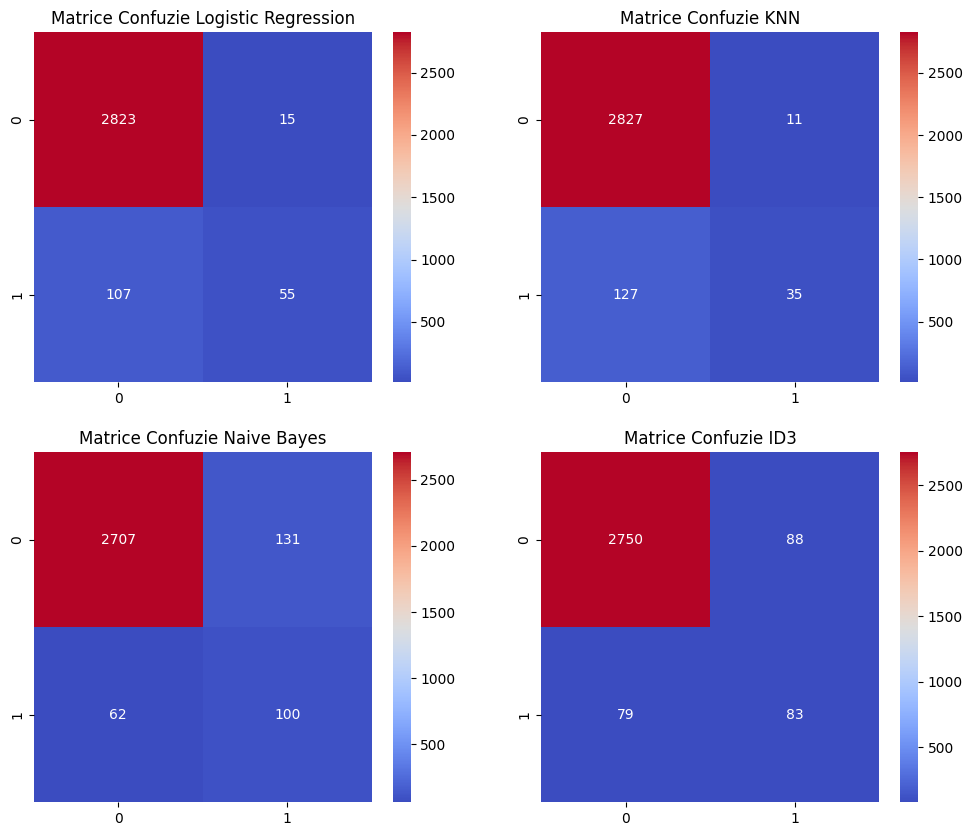

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, (model_name, cm) in zip(axes.flatten(), conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='coolwarm')
    ax.set_title(f"Matrice Confuzie {model_name}")
plt.show()

 13. Concluzii
# Comparăm metricile obținute și discutăm care algoritm oferă rezultate mai bune pentru detectarea fraudei.

